<a href="https://colab.research.google.com/github/kp20409/CE888/blob/main/LAB4/my_recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC

import matplotlib.pyplot as plt
np.set_printoptions(precision=3)

In [14]:
user_ratings_df = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab4-recommender/jester-data-1.csv")
user_ratings_df.columns = list(range(user_ratings_df.shape[1]))

user_ratings_df = user_ratings_df.replace(99.00, np.nan)
user_ratings_df.drop([0], axis='columns', inplace=True)

print('Rating by user 804 for joke 12: ', user_ratings_df.iloc[5702, 69])

Rating by user 804 for joke 12:  -6.17


In [7]:
#code to find best and worst jokes

col_sums = []

for i in range(user_ratings_df.shape[1]):

  col_vals = user_ratings_df[i+1].tolist()
  col_vals = [col_vals for col_vals in col_vals if str(col_vals) != 'nan']
  col_vals = np.array(col_vals)

  col_sums.append(col_vals.sum()/len(col_vals))

minpos = col_sums.index(min(col_sums))
maxpos = col_sums.index(max(col_sums))

print("The worst joke is", minpos + 1) 
print("The best joke is", maxpos + 1)

The worst joke is 58
The best joke is 50


In [9]:
n_latent_factors = 2

user_ratings = user_ratings_df.values

print('User ratings shape:', user_ratings.shape)

# Initialise as random values
latent_user_preferences = np.random.random((user_ratings.shape[0], n_latent_factors))
latent_item_features = np.random.random((user_ratings.shape[1], n_latent_factors))

print('Latent user preferences shape: ', latent_user_preferences.shape)
print('Latent user features shape', latent_item_features.shape)

User ratings shape: (24982, 100)
Latent user preferences shape:  (24982, 2)
Latent user features shape (100, 2)


In [10]:
def predict_rating(user_id, item_id):
    """ Predict a rating given a user_id and an item_id.
    """
    user_preference = latent_user_preferences[user_id]
    item_preference = latent_item_features[item_id]
    return user_preference.dot(item_preference)


def train(user_id, item_id, rating, alpha=0.0001):
    #print(item_id)
    predicted_rating = predict_rating(user_id, item_id)
    err =  predicted_rating - rating
    #print(err)
    user_pref_values = latent_user_preferences[user_id]
    latent_user_preferences[user_id] -= alpha * err * latent_item_features[item_id]
    latent_item_features[item_id] -= alpha * err * user_pref_values
    return err
    

def sgd(iterations):
    """ Iterate over all users and all items and train for 
        a certain number of iterations
    """
    mse_history = []
    for iteration in range(iterations):
        error = []
        for user_id in range(latent_user_preferences.shape[0]):
            for item_id in range(latent_item_features.shape[0]):
                rating = user_ratings[user_id, item_id]
                if not np.isnan(rating):
                    err = train(user_id, item_id, rating)
                    error.append(err)
        mse = (np.array(error) ** 2).mean()   
        if (iteration % 2) == 0:
            print('Iteration %d/%d:\tMSE=%.6f' % (iteration, iterations, mse))
            mse_history.append(mse)
    return mse_history

In [11]:
num_iter = 30
hist = sgd(num_iter)  # Note how the MSE decreases with the number of iterations

Iteration 0/30:	MSE=26.145372
Iteration 2/30:	MSE=24.919786
Iteration 4/30:	MSE=24.446809
Iteration 6/30:	MSE=23.963767
Iteration 8/30:	MSE=23.466691
Iteration 10/30:	MSE=22.958584
Iteration 12/30:	MSE=22.431681
Iteration 14/30:	MSE=21.860927
Iteration 16/30:	MSE=21.206704
Iteration 18/30:	MSE=20.442952
Iteration 20/30:	MSE=19.613725
Iteration 22/30:	MSE=18.849811
Iteration 24/30:	MSE=18.270877
Iteration 26/30:	MSE=17.891714
Iteration 28/30:	MSE=17.657024


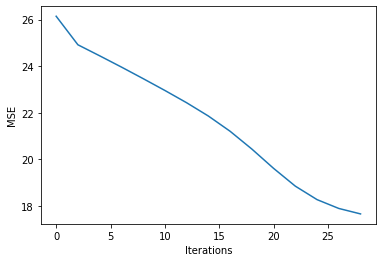

In [12]:
plt.figure()
plt.plot(np.arange(0, num_iter, 2), hist)
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.show()

In [13]:
predictions = latent_user_preferences.dot(latent_item_features.T)
print('Predictions shape: ', predictions.shape)

Predictions shape:  (24982, 100)


In [15]:
print(latent_item_features)

[[ 4.418 -1.385]
 [ 4.83  -2.   ]
 [ 5.065 -2.572]
 [ 5.584 -5.519]
 [ 3.565 -1.056]
 [ 5.057  0.241]
 [ 3.622 -2.693]
 [ 2.417 -2.542]
 [ 5.525 -4.593]
 [ 4.59  -1.086]
 [ 4.93   0.337]
 [ 5.301  0.133]
 [ 2.925 -4.55 ]
 [ 5.317  0.092]
 [ 2.466 -4.532]
 [ 2.893 -7.032]
 [ 2.75  -2.917]
 [ 3.295 -3.129]
 [ 3.942 -1.794]
 [ 4.287 -3.648]
 [ 4.783  1.527]
 [ 5.589 -1.697]
 [ 5.474 -3.097]
 [ 5.357 -6.204]
 [ 5.518 -2.175]
 [ 5.256 -0.045]
 [ 3.535  3.83 ]
 [ 4.927  0.154]
 [ 3.366  3.643]
 [ 5.996 -4.157]
 [ 4.403  1.914]
 [ 3.567  3.752]
 [ 5.579 -5.453]
 [ 5.176 -0.799]
 [ 3.813  3.411]
 [ 3.26   3.952]
 [ 4.91  -5.381]
 [ 5.079 -0.937]
 [ 5.378 -0.625]
 [ 5.365 -1.174]
 [ 5.849 -4.137]
 [ 4.794  1.274]
 [ 5.433 -4.906]
 [ 4.549 -6.862]
 [ 5.184 -0.94 ]
 [ 4.744  0.25 ]
 [ 4.886  0.397]
 [ 4.698  0.742]
 [ 4.112  2.925]
 [ 3.187  4.621]
 [ 6.071 -4.096]
 [ 5.928 -3.015]
 [ 3.682  3.523]
 [ 4.197  2.875]
 [ 5.105 -2.344]
 [ 4.711  0.926]
 [ 4.956 -6.839]
 [ 4.427 -9.05 ]
 [ 5.743 -4.33